# Alcoy Tourist

## Introducción

El objetivo general de este proyecto es realizar un análisis sobre los datos turísticos de la ciudad de Alcoy.

A la hora de realizar este análisis, disponemos de los siguientes objetivos secundadrios:

- Detectar turistas que llegan a Alcoy gracias a un sistema inteligente.
- Evaluar el rendimiento del sistema comparando los turistas detectados respecto a los turistas de los que se tienen datos.
- Análisis mensual de la cantidad de turistas.
- Descubrimiento de conocimiento en base a datos de las encuestas.

El sistema inteligente dispone de información relativa a los dispositivos conectados a la red que se encuentran en la ciudad de Alcoy (pudiéndose considerar como routers). Además, es capaz de rastrear los puntos de conexión favoritos de los dispositivos personales de los viandantes (se pueden considerar como teléfonos móviles) siempre y cuando éstos tengan el WiFi activado.

Para lograr los objetivos de ese proyecto se dispone de tres conjuntos de datos:
- `datosEncuesta2206`: se trata de encuestas que se han realizado a las personas que han accedido a las oficinas de turismo y aportan información útil para el análisis. Los campos de este conjunto de datos son: la fecha de la visita, lugar de residencia, número de acompañantes y si tienen el wifi activado o no.
- `datosSensorTurismo2206`: contiene la información de las conexiones de los dispositivos móviles rastreados (MAC) a un punto de acceso (SSID).
- `ssidsAlcoi`: un listado con todas las SSIDS rastreadas de Alcoy.


Hay que tener en cuenta que el objetivo de este proyecto no es sencillo, no todos los visitantes tienen activado el Wifi de su teléfono. Por lo que no se pueden la detección de estos turistas por el sistema.

# Imports

In [1]:
import sweetviz as sv
import pandas as pd

# Data

## Paths definition

Se definirán la ruta desde la que se cargarán los datos, así como la ruta donde se guardarán los reportes generados por Sweetviz.

In [2]:
DATA_PATH = 'data'
REPORTS_PATH = 'reports/'

## Data loading

En primer lugar cargaremos los datasets que se utilizarán en este proyecto.

In [3]:
quiz_df = pd.read_csv(f"{DATA_PATH}/datosEncuesta2206.csv")
sensor_df = pd.read_csv(f"{DATA_PATH}/datosSensorTurismo2206.csv")
ssids_df  = pd.read_csv(f"{DATA_PATH}/ssidsAlcoi.csv")

# Analyisis

In [4]:
# quiz_report = sv.analyze(quiz_df)
# quiz_report.show_html(f"{REPORTS_PATH}/Quiz.html")

# sensor_report = sv.analyze(sensor_df)
# sensor_report.show_html(f"{REPORTS_PATH}/Sensors.html")

# ssids_report = sv.analyze(ssids_df)
# ssids_report.show_html(f"{REPORTS_PATH}/SSIDs.html")

A continuación listaremos todos los dispositivos que se han conectado a alguna de las redes conocidas en Alcoy, junto a la MAC del dispositivo, se mostrará el número de veces que se ha conectado a algún router (sea o no de Alcoi) desde que se empezó a recoger esta información por el sistema.

In [5]:
sorted_macs_ssid = sensor_df.groupby(by=["mac", 'ssid']).count().sort_values('date', ascending = False)
sorted_macs_ssid

,,date
mac,ssid,
d29675014f618f3ef3f6b75f146b4be71c513c16,cca78a1e963f3ba3443bf3e54a9aa939f73d223d,12807
5cbcffeab5fa9206a8c2712ef085daab688dd086,cca78a1e963f3ba3443bf3e54a9aa939f73d223d,1267
273a50bed34ca35e5d1987ea3b05ce765aae0e0e,917c1e46b3861300aebf9a14e47a6ec989c7ac9e,933
6ec65bc349733bc0e85d17294d3a9cb6d8b8bdc8,ffd2edd79fe4bac98610a2ad6892b53395e44e34,724
de6157c0185924febf402efa9e4c36a4cbe4cbb1,cca78a1e963f3ba3443bf3e54a9aa939f73d223d,496
...,...,...
57502713dc0b287ab0e893c8313f55598077630f,7a592c4a3d20f50b2ba09a85b67c6d2fc925664b,1
5751a0c6507a8accd8a13005b6976d663db69bad,7a592c4a3d20f50b2ba09a85b67c6d2fc925664b,1
575588aec3617b91ea18facfd1e52a939b47dd6f,b67ede98966e4c418becb185d7efc74e2f59aa15,1


Tal como se explica en la web **REFERENCIA DE ABAJO**, se considerarán turistas aquellas personas cuya red favorita en su teléfono no sea de una de Alcoy. Para esto se realizará un conteo del número de veces que cada dispositvo se ha conectado a alguna red (siendo de Alcoy o no), de esta forma se podrá analizar cual es la favorita para cada dispositivo, y, posteriormente, se filtrarán aquellas conexiones cuyo punto de acceso (routers) no sea de Alcoy para considerarlos turistas.

In [6]:
ssids_df = ssids_df.drop_duplicates()
sorted_macs = sensor_df.groupby(by=["mac", "ssid"]).count().sort_values('date', ascending = False)
sorted_macs

,,date
mac,ssid,
d29675014f618f3ef3f6b75f146b4be71c513c16,cca78a1e963f3ba3443bf3e54a9aa939f73d223d,12807
5cbcffeab5fa9206a8c2712ef085daab688dd086,cca78a1e963f3ba3443bf3e54a9aa939f73d223d,1267
273a50bed34ca35e5d1987ea3b05ce765aae0e0e,917c1e46b3861300aebf9a14e47a6ec989c7ac9e,933
6ec65bc349733bc0e85d17294d3a9cb6d8b8bdc8,ffd2edd79fe4bac98610a2ad6892b53395e44e34,724
de6157c0185924febf402efa9e4c36a4cbe4cbb1,cca78a1e963f3ba3443bf3e54a9aa939f73d223d,496
...,...,...
57502713dc0b287ab0e893c8313f55598077630f,7a592c4a3d20f50b2ba09a85b67c6d2fc925664b,1
5751a0c6507a8accd8a13005b6976d663db69bad,7a592c4a3d20f50b2ba09a85b67c6d2fc925664b,1
575588aec3617b91ea18facfd1e52a939b47dd6f,b67ede98966e4c418becb185d7efc74e2f59aa15,1


El siguiente paso será obtener la red favorita de cada dispositivo, obteniendo aquella conexión que más veces se ha producido desde un dispositivo a un SSID:

In [7]:
# Agrupamos el dataframe por mac y por ssid, haciendo un conteo para visualizar
# el nº de veces que un dispositivo se ha conectado a una ssid en concreto.
sorted_macs = sensor_df.groupby(by=["mac", "ssid"])['date'].count().reset_index(name="connections").sort_values('connections', ascending = False)

# Haciendo un group by por mac, obtenemos el id del registro de aquellos conteos máximos, es decir,
# para cada dispositivo calculamos el valor máximo (máximo número de conexiones a las redes) y obtenemos
# su id para después poder referenciar el dispositivo y la red que ha tenido más conexiones por su parte.
idx_max_macs = sorted_macs.groupby(['mac'])['connections'].idxmax()

# Obtenemos los registros en base a los índices calculados anteriormente y ordenamos de forma descendente.
sorted_macs  = sorted_macs.loc[idx_max_macs].sort_values('connections', ascending = False)

sorted_macs

,mac,ssid,connections
15559,d29675014f618f3ef3f6b75f146b4be71c513c16,cca78a1e963f3ba3443bf3e54a9aa939f73d223d,12807
6917,5cbcffeab5fa9206a8c2712ef085daab688dd086,cca78a1e963f3ba3443bf3e54a9aa939f73d223d,1267
2946,273a50bed34ca35e5d1987ea3b05ce765aae0e0e,917c1e46b3861300aebf9a14e47a6ec989c7ac9e,933
8270,6ec65bc349733bc0e85d17294d3a9cb6d8b8bdc8,ffd2edd79fe4bac98610a2ad6892b53395e44e34,724
16403,de6157c0185924febf402efa9e4c36a4cbe4cbb1,cca78a1e963f3ba3443bf3e54a9aa939f73d223d,496
...,...,...,...
6494,575905f14f00a35cd78292cca34d247285dba5e9,ca5a36444b047eb95e491fa2e70f968ae048ab10,1
6495,575a15e5ce9c7d65094333b9414cfcee1f49b9e9,5481655e85d7b477c2b37270be825fab0638e137,1
6496,575b3cf0642ac6ed9893dc02a0e541aef93183e2,79b10e6c830d5c4d8ef7ac53ac685df439ad6f23,1
6497,575e5b90c000c38c665a032eb1dca6805119a866,7a592c4a3d20f50b2ba09a85b67c6d2fc925664b,1


In [8]:
# Routers únicos a los que se han conectado los dispositivos alguna vez
print(len(sorted_macs.ssid.unique()))
# Routers únicos total registrados por el camión de basura (total ciudad).
print(len(ssids_df.ssid.unique()))

# Existen muchos más routers detectados por el camión que puntos de acceso únicos a los que se conectan los móviles.

1004
34259


Como la conexión favorita de los dispositivos no debe ser de Alcoy, eliminaremos aquellos dispositivos cuya conexión favorita sabemos que es de Alcoy.

In [9]:
sorted_macs = sorted_macs[~sorted_macs.ssid.isin(ssids_df.ssid)]
sorted_macs

,mac,ssid,connections
8270,6ec65bc349733bc0e85d17294d3a9cb6d8b8bdc8,ffd2edd79fe4bac98610a2ad6892b53395e44e34,724
14608,c5cf42dbeeeec2c87097c74cb45c72343b70f5a5,ca5a36444b047eb95e491fa2e70f968ae048ab10,105
17411,ec4931e131e3ffbabb54c05249f97db9f0684c93,ffd2edd79fe4bac98610a2ad6892b53395e44e34,100
2886,2645ffe542737dd58232ebd8eab47245ebd631ce,cfaeaac13a5e3e68077133a0886eea13760f146f,76
9173,7b535408d7c0ada32bca60984ffb653ae4100708,bcdb505c4bee05b51423fdce27786e07fa7af46d,75
...,...,...,...
6489,57458c53b83c7ad8b7afbcf00b89559ae053d70c,2aa3b84471cfaa3ab3ec92df5cc92f56617bec59,1
6493,575588aec3617b91ea18facfd1e52a939b47dd6f,b67ede98966e4c418becb185d7efc74e2f59aa15,1
6494,575905f14f00a35cd78292cca34d247285dba5e9,ca5a36444b047eb95e491fa2e70f968ae048ab10,1
6495,575a15e5ce9c7d65094333b9414cfcee1f49b9e9,5481655e85d7b477c2b37270be825fab0638e137,1


Obtenemos un total de 10.876 dispositivos cuya red favorita no es de Alcoy, por lo tanto los podemos considerar comom turistas.

In [10]:
COLUMNS_RENAMED = ['date', 'residence_1', 'residence_2', 'companions_number', 'companions_visited_info_office', 'wifi_enabled']

quiz_df.columns = COLUMNS_RENAMED
quiz_df['date'] = pd.to_datetime(quiz_df['date'], infer_datetime_format = True)
quiz_df['residence_2'] = quiz_df['residence_2'].str.strip()

quiz_df

/home/luis/anaconda3/envs/TFM/lib/python3.9/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname EET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,date,residence_1,residence_2,companions_number,companions_visited_info_office,wifi_enabled
0,2021-06-22 10:05:40,Alcoi,NaN,2,2,No entiendo la pregunta
1,2021-06-22 10:58:33,España,Madrid,0,0,No
2,2021-06-23 10:13:42,Alcoi,NaN,0,0,Sí
3,2021-06-23 10:14:04,España,Amposta,1,1,Sí
4,2021-06-23 10:46:55,Internacional,Belgica,1,1,Sí
...,...,...,...,...,...,...
2592,2022-02-28 17:11:25,Internacional,Francia,4,4,Sí
2593,2022-02-28 17:46:35,Comunidad Valenciana,Torreviaje,1,1,No
2594,2022-02-28 18:21:35,Internacional,Chile,0,0,No
2595,2022-02-28 18:22:04,Alcoi,NaN,2,2,Sí


Se muestra un histograma de la procedencia de los turistas que han rellenado la encuesta de las oficinas de turismo:

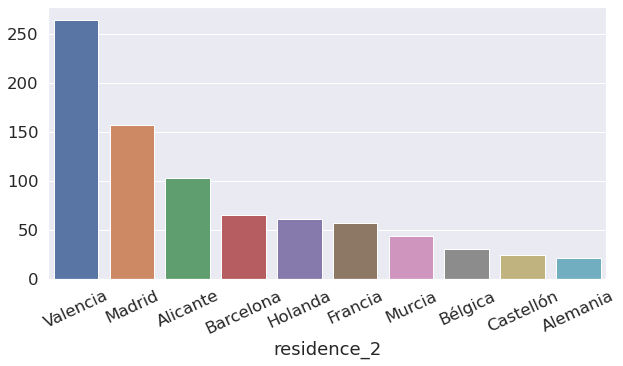

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

top_visitor_places = quiz_df.groupby(['residence_2'])['residence_2'].count().sort_values(ascending = False)
plt.figure(figsize=(10, 5))
histogram = sns.barplot(x = top_visitor_places[:10].index,
                        y = top_visitor_places[:10].values)
histogram.tick_params(axis='x', rotation=25)

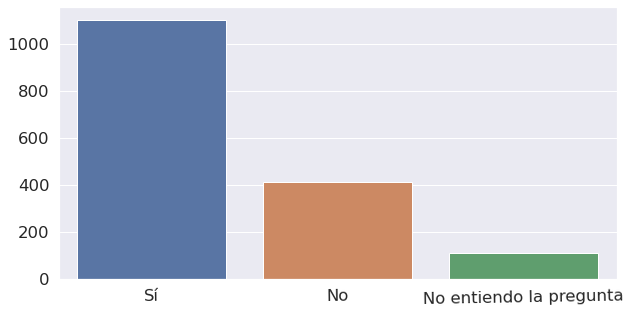

In [37]:
tourist_wifi_enabled = quiz_df[quiz_df['residence_1'] != 'Alcoi']['wifi_enabled'].value_counts()

plt.figure(figsize=(10, 5))
histogram = sns.barplot(x = tourist_wifi_enabled.index,
                        y = tourist_wifi_enabled.values)

histogram.tick_params(axis='x', rotation = 1)

Ciñéndonos a los turistas que son conscientes de que han activado el wifi, con el sistema implantado se estaría capturando aproximadamente el 47% de los turistas totales que visitan la ciudad.

In [13]:
quiz_df['date'] = quiz_df['date'].dt.strftime('%Y-%m')
single_tourist_info_visitors = quiz_df.loc[quiz_df.index.repeat(quiz_df.companions_number)]
tourist_info_visitors = single_tourist_info_visitors.groupby(by = ['date'])['residence_1'].count()

# TEST

Se mostrará una representación de las dimensiones de las encuestas par a par, con el objetivo de encontrar correlaciones y patrones en los comportamientos en función de las variables del conjunto de datos.

<Figure size 2160x1440 with 0 Axes>

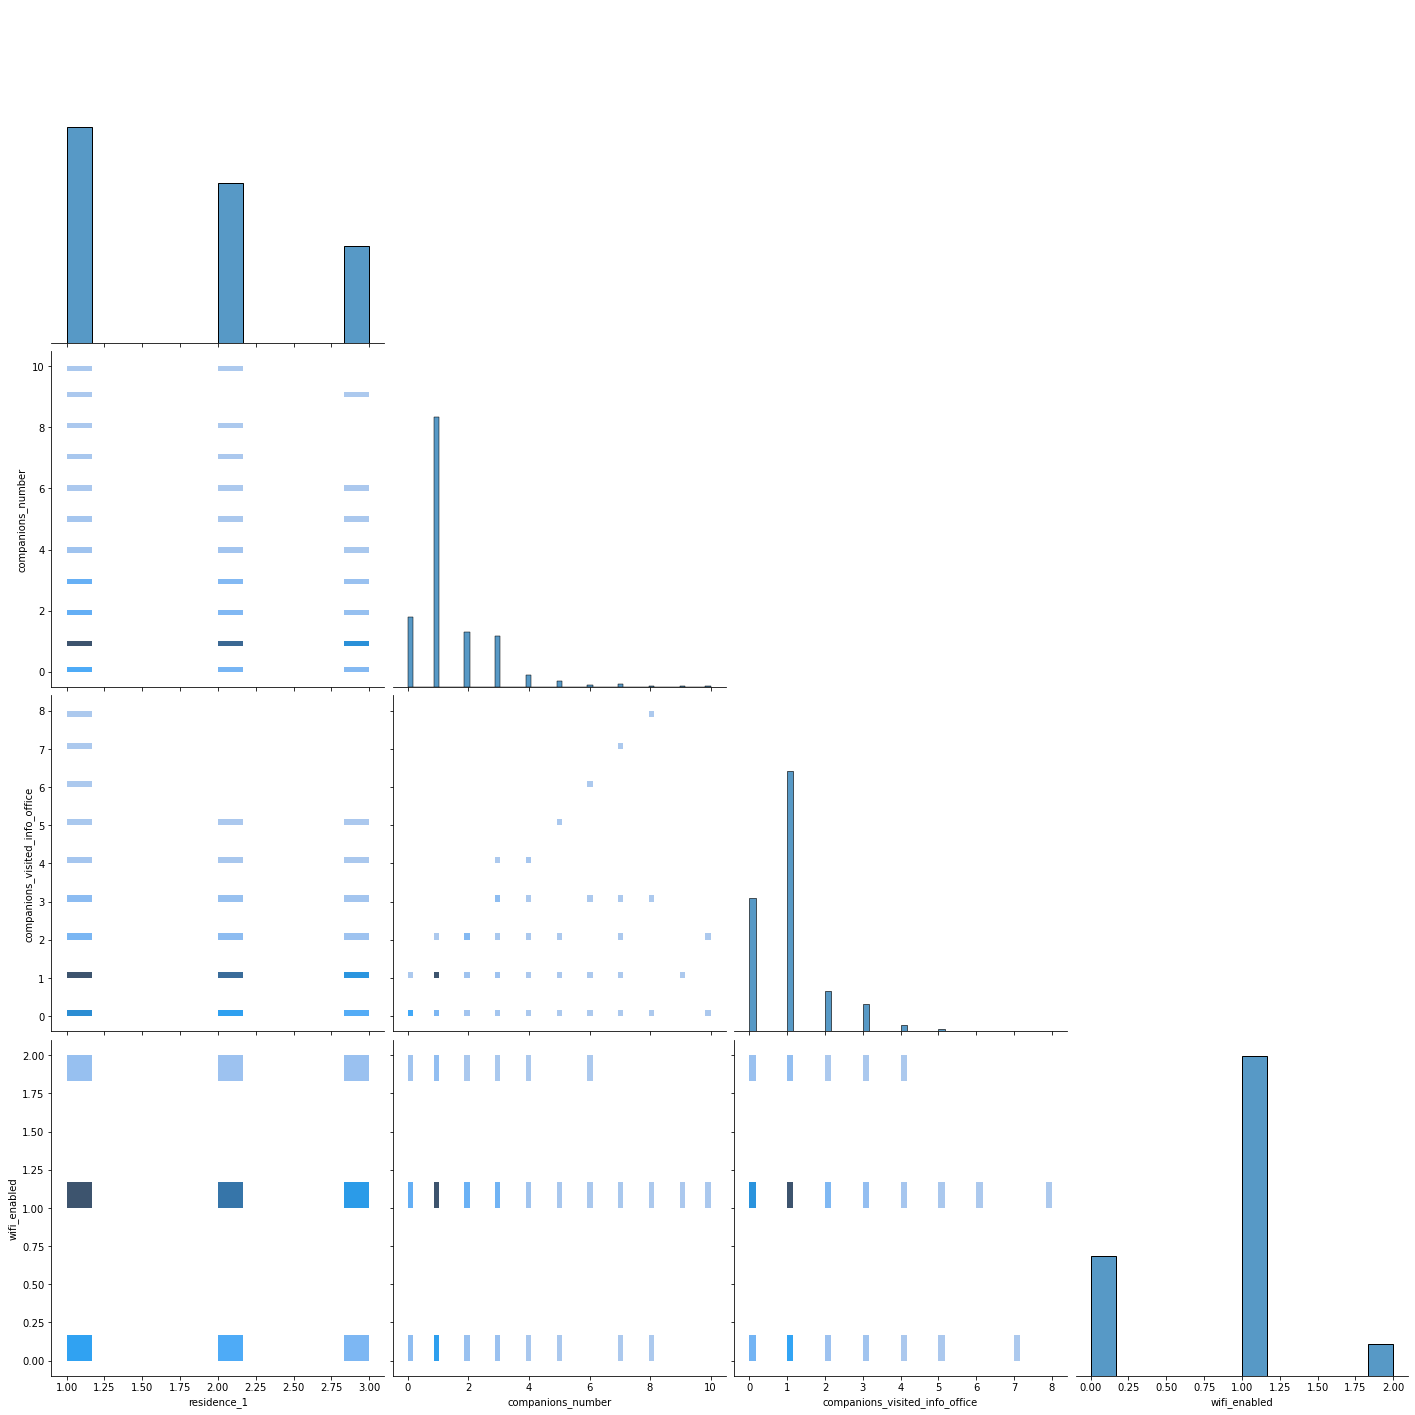

In [14]:
wifi_replace = {'No': 0,
                'Sí': 1,
                'No entiendo la pregunta': 2
               }
residence_replace = {'Alcoi': 0,
                     'Comunidad Valenciana': 1,
                     'España': 2,
                     'Internacional': 3
                   }
quiz_aux_df = quiz_df.copy()
quiz_aux_df['wifi_enabled'].replace(wifi_replace, inplace = True)
quiz_aux_df['residence_1'].replace(residence_replace, inplace = True)

quiz_aux_df = quiz_aux_df[quiz_aux_df['residence_1'] != 0]

plt.figure(figsize=(30, 20))
sns.pairplot(quiz_aux_df, kind="hist", corner = True, height = 5)

Analizando la gráfica de lugar de residencia y número de personas que acompañan al turista se observa que hay una de las localidades que contiene valores más altos para el número de acompañantes. En la siguiente gráfica se mostrará la distribución de acompañantes en función de la región origen de los turistas:

<AxesSubplot:xlabel='companions_number', ylabel='Count'>

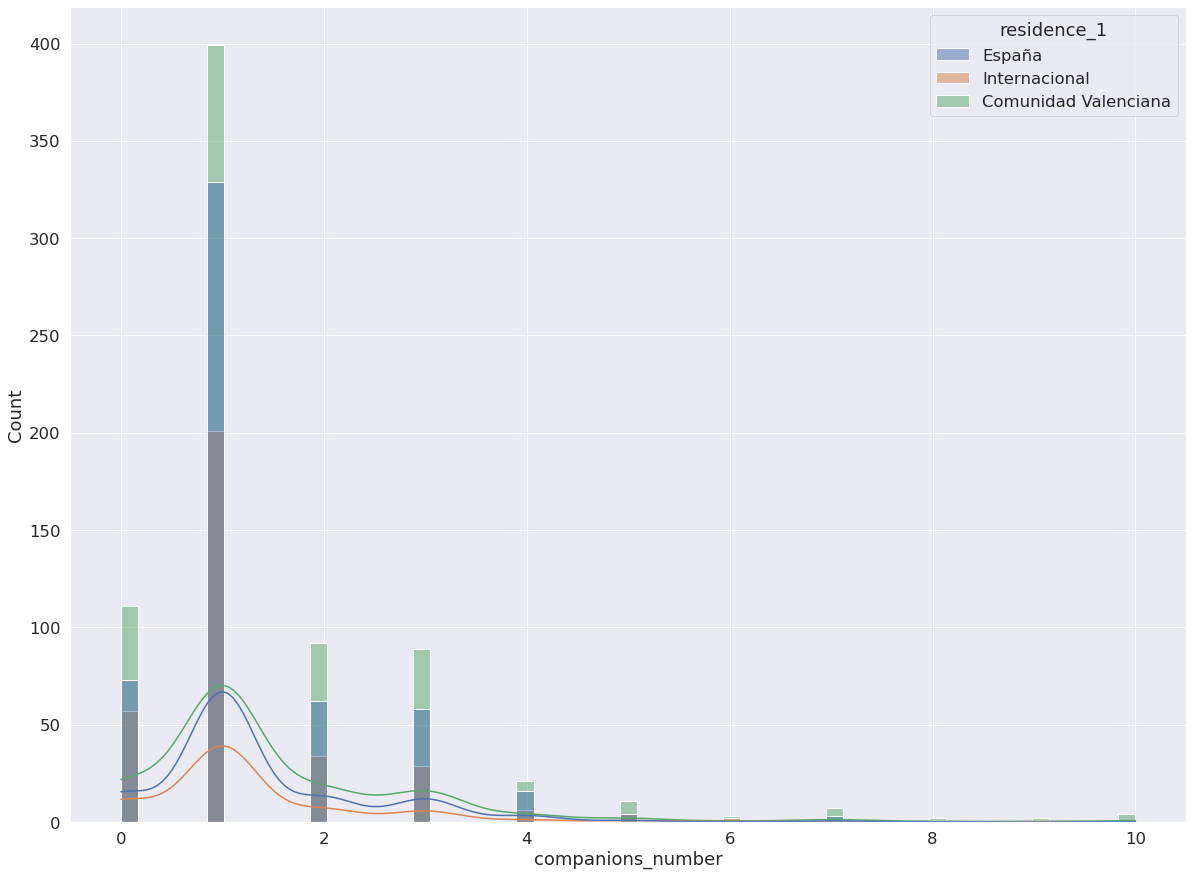

In [15]:
aux = quiz_df[quiz_df['residence_1'] != 'Alcoi']

sns.set(font_scale = 1.5)
plt.figure(figsize=(20,15))
sns.histplot(data=aux, x="companions_number", hue="residence_1", kde=True)

Se observa que los turistas de la comunidad valenciana suelen venir acompañados en grupos de hasta 10 personas mucho más frecuentemente que de turistas de origen internacional y nacional. Incluso en los grupos de cuatro personas, proporcionalmente 

<AxesSubplot:xlabel='companions_number', ylabel='Count'>

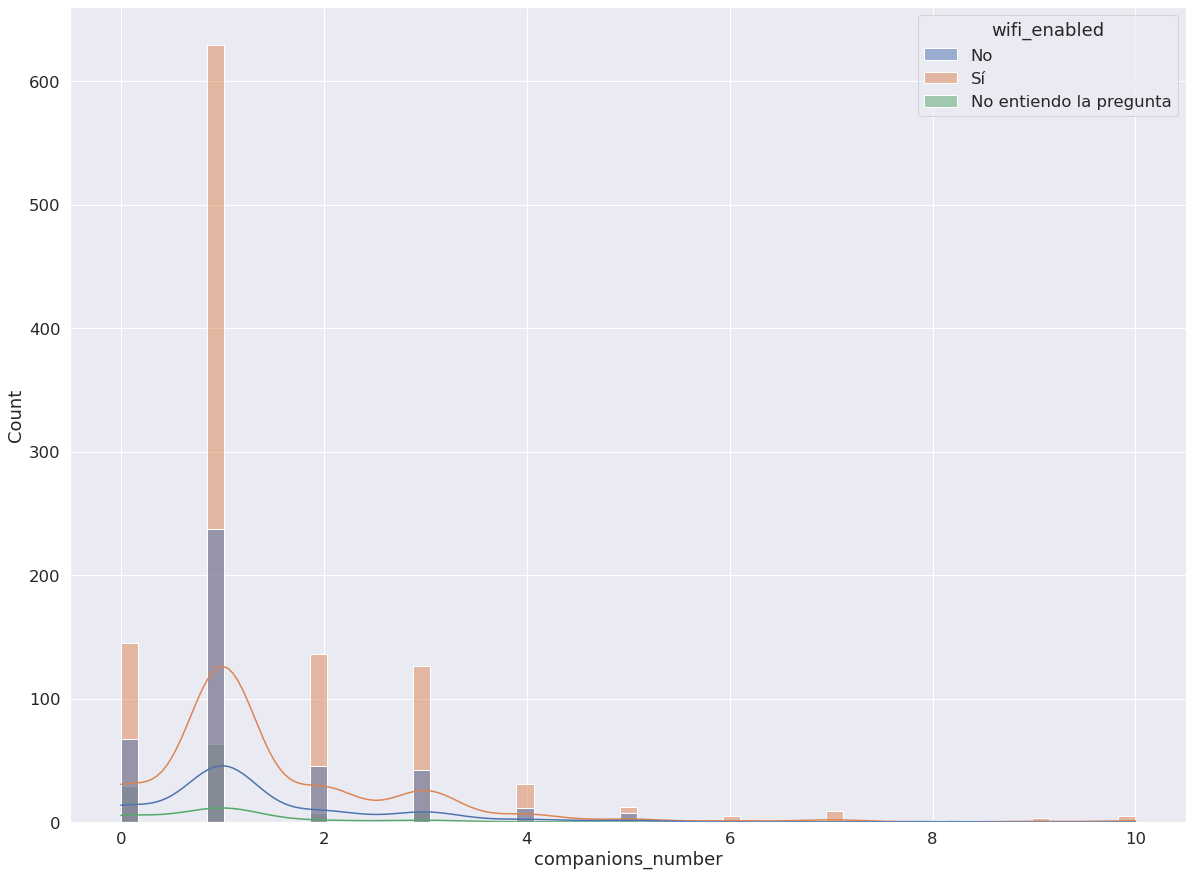

In [16]:
# Comparativa acompañantes/acompañantes-oficina - Wifi
# fig, axes = plt.subplots(1, 2, figsize=(30,15))
# sns.set(font_scale = 1.5)
# sns.histplot(ax=axes[0], data=aux, x="companions_number", hue="wifi_enabled", kde=True)
# sns.histplot(ax=axes[1], data=aux, x="companions_visited_info_office", hue="wifi_enabled", kde=True)


plt.figure(figsize=(20,15)) #change your figure size as per your desire here
sns.set(font_scale = 1.5)
sns.histplot(data=aux, x="companions_number", hue="wifi_enabled", kde=True)

# Referencias

[CÓMO MEDIR LA POBLACIÓN TURÍSTICA REAL: ALCOY TOURIST LAB](https://www.turismecv.com/2021/11/30/como-medir-la-poblacion-turistica-real-alcoy-tourist-lab/)